In [ ]:
# Fill in your name using the format below and student ID number
group_id = "9"
team_member_1 = "Boris, Binnendijk,  2087525"
team_member_2 = "Bocsardi, Gergo, 2087852"
team_member_3 = "Chan, Kit, 2014896"
team_member_4 = "Huang, Yikang, 2056298"
team_member_5 = "Sowirono, Virgil, 2071278"

In [ ]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = True

In [ ]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Uncomment the following line to run in Google Colab to install OpenML
!pip install --quiet openml

     |████████████████████████████████| 119 kB 12.1 MB/s 
     |████████████████████████████████| 75 kB 3.9 MB/s 


In [ ]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructions below.
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Uncomment to use OpenML caching with your Google Drive. After longer periods of inactivity, your Colab VM may be recycled, 
# in which case the dataset will have to be downloaded again. To avoid this, use the code below to let OpenML cache the dataset 
# on your Google Drive.
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/drive/MyDrive/cache')

In [ ]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

Did you ever wonder how Google Maps can locate specific house numbers? We'll find out using imagery from Google Streetview. 

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * E.g. '/content/drive/My Drive/Assignment3' if you don't change it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/My Drive/Assignment3'
#base_dir = './'

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* You should submit your notebook, but also a PDF and a link to all stored models. One way to do this is to upload them to GitHub.
* Ideally, your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to check that all the results are included in the notebook. Also upload a PDF (e.g. by printing to PDF) with all results as a backup.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit. [Read more about this dataset here](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/37648.pdf).

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. 

Also note that this dataset is about 1Gb large, and parsing it will take even more space in memory. You may need to switch to a high-RAM environment (only in Colab pro). As a workaround, we've hosted the pre-loaded OpenML version of this dataset and provided code to download it below - uncomment it if you prefer to use this.

In [ ]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [ ]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
#SVHN = oml.datasets.get_dataset(41081)
#X, y, _, _ = SVHN.get_data(dataset_format='array',
#    target=SVHN.default_target_attribute)

In [ ]:
# Backup solution to download the dataset file from.
# File: "https://drive.google.com/file/d/1zZRRe3ffmuAf1x4yZmYwG_rLiuggep2A/view?usp=sharing"
# Uncomment the text below to use this alternative

import pickle
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
gdrive = GoogleDrive(gauth)
downloaded = gdrive.CreateFile({'id':"1zZRRe3ffmuAf1x4yZmYwG_rLiuggep2A"})
downloaded.GetContentFile('dataset.pkl.py3')
with open("dataset.pkl.py3", "rb") as fh:
    data, categorical, attribute_names = pickle.load(fh)
d = data.to_numpy(dtype='int')
X, y = d[:,:-1], d[:,-1]-1

Reshape, sample and split the data

In [ ]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [ ]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again an 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

In [ ]:
del d

In [ ]:
del X_train_all, Xr, X
del y_train_all, yr, y

In [ ]:
X_train.shape, y_train.shape

((63544, 32, 32, 3), (63544, 10))

In [ ]:
X_val.shape, X_test.shape

((15887, 32, 32, 3), (19858, 32, 32, 3))

Check the formatting - and what the data looks like

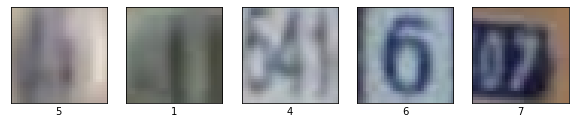

In [ ]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)] # random image's id
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

In [ ]:
images

[6796, 39302, 2196, 51189, 8735]

In [ ]:
np.argmax(y_train[33751])

6


### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [ ]:
from IPython.display import set_matplotlib_formats, display, HTML
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml as oml
import os
from cycler import cycler
from pprint import pprint

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
#plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.numpoints'] = 1

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

# Prints outputs in cells so that we don't have to write print() every time 
#InteractiveShell.ast_node_interactivity = "all"

# Matplotlib tweaks for presentations
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["figure.max_open_warning"] = -1
plt.rcParams['font.size'] = 8; 
plt.rcParams['lines.linewidth'] = 0.5


# Presentations
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': '95%', 'height': 786, 'scroll': True, 'theme': 'serif', 'transition': 'fade', 'overflow': 'visible', 'start_slideshow_at': 'selected'})


{'height': 786,
 'overflow': 'visible',
 'scroll': True,
 'start_slideshow_at': 'selected',
 'theme': 'serif',
 'transition': 'fade',
 'width': '95%'}

In [ ]:
# real time ploting

from IPython.display import clear_output
from tensorflow import keras

# For plotting the learning curve in real time
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
        self.max_acc = 0
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.max_acc = max(self.max_acc, logs.get('val_accuracy'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure(figsize=(8,3))
            plt.plot(N, self.losses, lw=2, c="b", linestyle=":", label = "loss")
            plt.plot(N, self.acc, lw=2, c="r", linestyle=":", label = "acc")
            plt.plot(N, self.val_losses, lw=2, c="b", linestyle="-", label = "val_loss")
            plt.plot(N, self.val_acc, lw=2, c="r", linestyle="-", label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}, Max Acc {:.4f}]".format(epoch, self.max_acc))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
  """ Prints text in red. Just for fun.
  """
  if verbose>0:
    print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
  return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
  """ Trains and evaluates the given model on the predefined train and test splits,
  stores the trained model and learning curves. Also prints out a summary of the 
  model and plots the learning curves.
  Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data is given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
  """
  model = model_builder(**kwargs)
  if not model:
    shout("No model is returned by the model_builder")
    return
  if not hasattr(model, 'fit'):
    shout("Model is not built correctly")
    return
  learning_curves = {}
  if train and not stop_training: # Train anew
    shout("Training the model", verbose)
    if generator:
      generator, X_val, y_val = data
      history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                          steps_per_epoch=steps_per_epoch, verbose=1, 
                          validation_data=(X_val, y_val), callbacks=[TrainingPlot()])
      learning_curves = history.history
    else:
      X_train, X_val, y_train, y_val = data
      history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                          verbose=1, validation_data=(X_val, y_val), callbacks=[TrainingPlot()])
      learning_curves = history.history
    shout("Saving to file", verbose)
    save_model_to_file(model, base_dir, name)
    with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
      pickle.dump(learning_curves, file_pi)
    shout("Model stored in "+base_dir, verbose)
    lc = pd.DataFrame(learning_curves)
  else: # Load from file
    shout("Loading model from file", verbose)
    model = load_model_from_file(base_dir, name)
    if not model:
      shout("Model not found")
      return
    learning_curves = None
    try:
      learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
    except FileNotFoundError:
      shout("Learning curves not found")
      return
    shout("Success!", verbose)
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-'])
    plt.xlabel('epochs')
  # Report
  print(model.summary())
  print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras.optimizers import Adam

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,647,946
Trainable params: 1,647,946
Non-trainable params: 0
_________________________________________________________________
None
     l

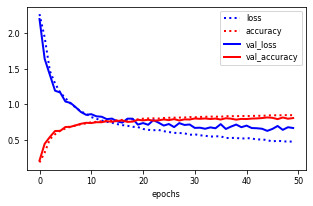

In [ ]:
def build_model_1_1():

  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(units=512, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dense(units=10, activation='softmax')) 

  model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

  return model 
 
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=256)
answer_q_1_1 = """
               ReLU was used as the activation function, as it is the default recommendation for modern neural networks. Softmax was used to obtain the probability distribution per class. A small batch size did not converge fast enough within 50 epochs and showed a lower accuracy. Therefore a larger batch size of 256 was used. The model obtained a maximum validation accuracy of ~0.82, which is pretty high for a simple model without preprocessing/regularization.                
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [ ]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [ ]:
def standardize_gray_x(X):
  """
  Standardize data X, where input must be a 4D shape (image, pixel_axis0, pixel_axis1, RGB-channels)
  """
  
  # Calculate the mean RGB values per image per channel (R, G, B), then calculate the global RBG mean per channel
  X_mean = np.mean(X, axis = (0,1,2))
  # Calculate the std RGB values per image per channel (R, G, B), then calculate the global RBG std per channel
  X_std = np.std(X, axis=(0,1,2))
  
  # List that stores all standardized data (shape = (len(X), 32, 32, 3))
  X_list = [((image - X_mean) / X_std )for image in X]
  # Return X as an array
  return np.asarray(X_list)

In [ ]:
X_train_gray = standardize_gray_x(rgb2gray(X_train))
X_val_gray = standardize_gray_x(rgb2gray(X_val))

# Replace with the preprocessed data
preprocessed_split = X_train_gray, X_val_gray, y_train, y_val

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 599,370
Trainable params: 599,370
Non-trainable params: 0
_________________________________________________________________
None
     loss 

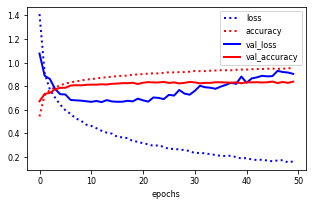

In [ ]:
# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((32*32,), input_shape=(32,32,1)))
  model.add(layers.Dense(units=512, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dense(units=10, activation='softmax')) 

  model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])    

  return model 

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=256)
answer_q_1_2 = """
               RGB to grayscale conversion helps to reduce the complexity of the data, whilst also reducing the noise that color may introduce. Additionally, standardization was used to transform the grayscaled images to a standard Gaussian distribution to obtain more consistency throughout the dataset. These two steps made it easier for the model to learn and helped to boost the validation accuracy to ~0.84, however, the model now starts overfitting (as seen in figure) 
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [ ]:
# Uncomment the following lines to use keras hyperparameter tuning packages
# !pip install -q -U keras-tuner
# from tensorflow.keras import regularizers
# from tensorflow.keras import optimizers
# import keras_tuner as kt
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Uncomment the following lines to run the hyperparameter optimization using keras_tuner and RandomSearch, with val_accuracy as the objective.
# For each of the 3 hidden layers, the option for batchnormalization was added (boolean option)
# As well as a dropout, that could be tuned by using hp.Choice, allowing for dropouts within a range [0, 0.5]

# def build_model_1_3_kt1(hp):
  
#   model = models.Sequential()
#   model.add(layers.Reshape((32*32,), input_shape=(32,32,1)))

#   model.add(layers.Dense(units=512, activation='relu', kernel_initializer='he_normal'))
#   if hp.Boolean('batchnorm_1'):model.add(layers.BatchNormalization())
#   model.add(layers.Dropout(hp.Choice('dropout_1', values = [0.0, 0.1, 0.3, 0.5])  ) )

#   model.add(layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
#   if hp.Boolean('batchnorm_2'): model.add(layers.BatchNormalization())
#   model.add(layers.Dropout(hp.Choice('dropout_2', values = [0.0, 0.1, 0.3, 0.5]) ) )

#   model.add(layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
#   if hp.Boolean('batchnorm_3'): model.add(layers.BatchNormalization())
#   model.add(layers.Dropout(hp.Choice('dropout_3', values = [0.0, 0.1, 0.3, 0.5])  ) )

#   model.add(layers.Dense(units=10, activation='softmax')) 

#   model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

#   return model

# tuner = kt.RandomSearch(build_model_1_3_kt1, max_trials=25, objective = 'val_accuracy', overwrite=True)
# tuner.search(X_train_gray, y_train, epochs = 50, batch_size = 256, validation_data = (X_val_gray, y_val))
# tuner.results_summary()

# The tuner results were the following:
# Hyperparameters:
# batchnorm_1: False
# dropout_1: 0.1
# batchnorm_2: True
# dropout_2: 0.5
# batchnorm_3: True
# dropout_3: 0.3
# Score: 0.870082437992096

Loading model from file
Success!
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                     

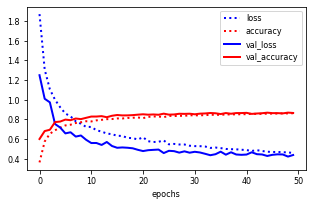

In [ ]:
from tensorflow.keras import regularizers
def build_model_1_3():
  
  model = models.Sequential()
  model.add(layers.Reshape((32*32,), input_shape=(32,32,1)))

  # Hidden layer 1
  model.add(layers.Dense(units=512, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dropout(0.1))

  # Hidden layer 2
  model.add(layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  # Hidden layer 3
  model.add(layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(units=10, activation='softmax')) 

  model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_3 = """
               It was experimentally observed that dropout and batch normalization had the best effects on accuracy; these hyperparameters were tuned using a RandomSearch (from keras_tuner). Implementing the (optimized) hyperparameters shows that the model does not overfit anymore, and boosts the validation accuracy to ~0.87. Both the preprocessing and regularization allow the model to converge faster, therefore the batch size was reduced to 32 (showing the same results for 256)
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

In [ ]:
def build_model_2_1():
  model = models.Sequential()
  #model.add(layers.Reshape((32*32,), input_shape=(32,32,1)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(32,32,1)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal',  padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_normal', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu',  kernel_initializer='he_normal', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (3, 3), activation='relu',  kernel_initializer='he_normal', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu',  kernel_initializer='he_normal', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))
  model.add(layers.Flatten())

  model.add(layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
  #model.add(layers.Dropout(0.1))
  model.add(layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(units=10, activation='softmax')) 

  model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

Loading model from file
Success!
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                     

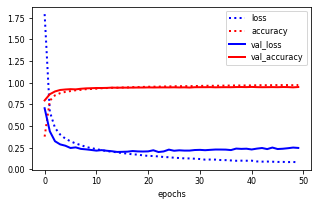

In [ ]:
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=256)
answer_q_2_1 = """
               The accuracy of the model increased by adding layers up until the current model. Adding more layers resulted in overfitting.
               Introducing regualization did not result in a higher accuracy for the validation set. Amount of filters increase as a power of 2 such that
               the model gradually captures more relevant patterns. Relu activation function is used to because it is better against vanishing gradient and recovery is 
               redundant. Padding = "same" was used because the images are low resolution. Max pooling is used to reduce the spatial dimensions such that the model focuses on 
               relevant patterns. he_normal kernel initialization is used because it is better for deeper networks.   
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                     

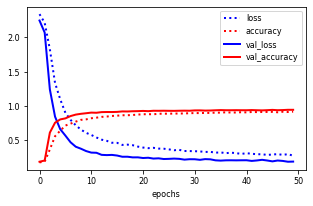

In [ ]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.3,
    zoom_range=0.15,
    fill_mode='nearest'
)

training_gen = train_datagen.flow(X_train_gray, y_train, batch_size=256)
preprocessed_split_gen = (training_gen, X_val_gray, y_val)

run_evaluation("model_2_2", build_model_2_1, preprocessed_split_gen, base_dir, generator=True,
               train=False, epochs=50, batch_size=256)

answer_q_2_2 = """To evaluate effects, the arguments are introduced consecutively. Adding augmentation types that alter images a lot yield lower accuracy, for both sets.
            Large parameter values reduces the accuracy. Augmentations which slightly adjust images are capable of yielding similar or a bit lower accuracy.
            Thus generating data through augmentation makes it harder for algorithms to recognize patterns, because the data is already big enough or the model suits the data 
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [ ]:
model_2_2 = load_model( '/content/drive/My Drive/Assignment3/model_2_2.h5')
learning_curve = pickle.load(open('/content/drive/My Drive/Assignment3/model_2_2.p', 'rb'))

In [ ]:
X_test_gray = standardize_gray_x(rgb2gray(X_test))
test_loss_3_1, test_accuracy_3_1 = model_2_2.evaluate(X_test_gray, y_test)

621/621 [==============================] - 13s 8ms/step - loss: 0.1916 - accuracy: 0.9466


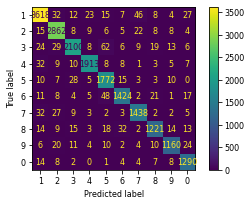

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_pred = model_2_2.predict(X_test_gray)

def plot_confusion_matrix():
    labels = [(i+1)%10 for i in range(10)]
    y_test_encoded = np.argmax(y_test, axis=1)
    y_test_pred_encoded = np.argmax(y_test_pred, axis=1)
    display = ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_test_pred_encoded, display_labels=labels)
    plt.show()

plot_confusion_matrix()

In [ ]:
from sklearn.metrics import  confusion_matrix

y_test_encoded = np.argmax(y_test, axis=1)
y_test_pred_encoded = np.argmax(y_test_pred, axis=1)
cm = confusion_matrix(y_test_encoded, y_test_pred_encoded)

mis_pre_rates = []
for i in range(10):
    correct_predict = cm[i][i]
    mis_predict = np.sum(cm[i][:i]) + np.sum(cm[i][i+1:10])
    rate = mis_predict/(mis_predict+correct_predict)
    mis_pre_rates.append(round(rate, 3))

print(mis_pre_rates)
max_rate = max(mis_pre_rates)
num_w_max_rate = (mis_pre_rates.index(max_rate) + 1) % 10
print(f'Most mis-predicted number is {num_w_max_rate}. ({max_rate})')

[0.046, 0.029, 0.077, 0.042, 0.044, 0.076, 0.056, 0.089, 0.073, 0.036]
Most mis-predicted number is 8. (0.089)


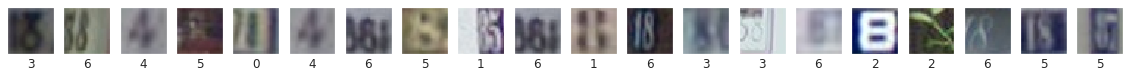

In [ ]:
def plot_misclassifications(num=10):
    # focus on one number 
    mis_filter = (y_test_encoded == mis_pre_rates.index(max_rate)) & (y_test_encoded != y_test_pred_encoded)
    X_test_mis = X_test[mis_filter]
    y_test_mis = y_test_pred_encoded[mis_filter]

    images = [randint(0, len(X_test_mis)) for i in range(num)]
    fig, axes = plt.subplots(1, len(images), figsize=(num, 5))
    for index in range(len(images)):
        image_id = images[index]
        axes[index].imshow(X_test_mis[image_id])
        axes[index].set_xlabel((y_test_mis[image_id] + 1) % 10)
        axes[index].set_xticks(())
        axes[index].set_yticks(())
    
    plt.show

plot_misclassifications(20)

answer_q_3_1 = """Accuracy on test set is 0.9466
    Number 3, 6, 8, 9 are classes that are often confused, with error rates .077, .076, .089, .073 respectively.
    For number 8, mistakes are caused mainly by noise in images. Top misclassifications of 8 are 1,3,5,6,9,0:
    For "1", both numbers are present which cause noise For the others numbers, pixels are noisy and harder to identify
    For "3", "9" and "5" noisy pixels at the left sides, for "5" and "6" noisy pixels at right sides and for "0" in the middle"""

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [ ]:
img_tensor = X_test_gray[0]
img_tensor = np.expand_dims(img_tensor, axis=0) 

# Extracts the outputs of the top 12 layers:
layer_outputs = [layer.output for layer in model_2_2.layers[:12]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model_2_2.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [ ]:
images_per_row = 16

layer_names = []
for layer in model_2_2.layers[:12]:
    layer_names.append(layer.name)

def plot_activations(layer_index, activations):
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_rows = n_features // images_per_row
        display_grid = np.zeros((size * n_rows, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for row in range(n_rows):
            for col in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 row * images_per_row + col]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[row * size : (row + 1) * size,
                             col * size : (col + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

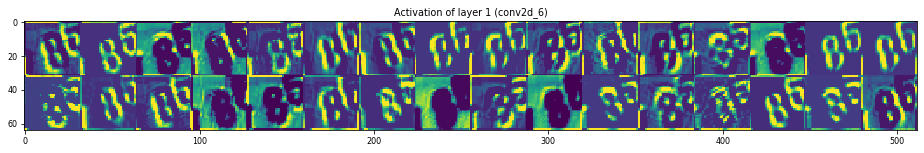

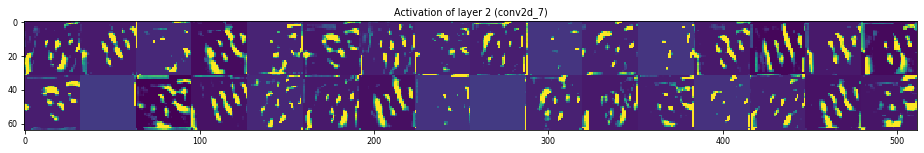

In [ ]:
plot_activations(0, activations)
plot_activations(1, activations)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


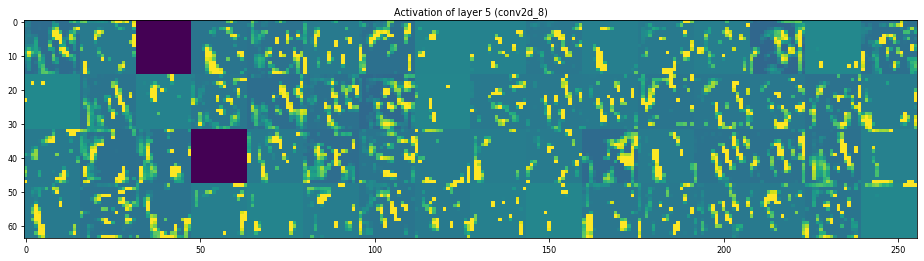

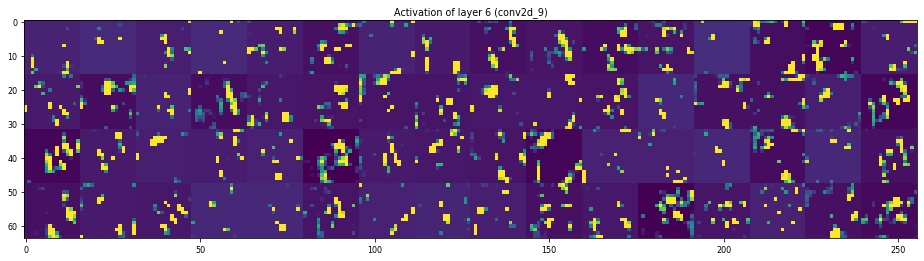

In [ ]:
plot_activations(4, activations)
plot_activations(5, activations)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


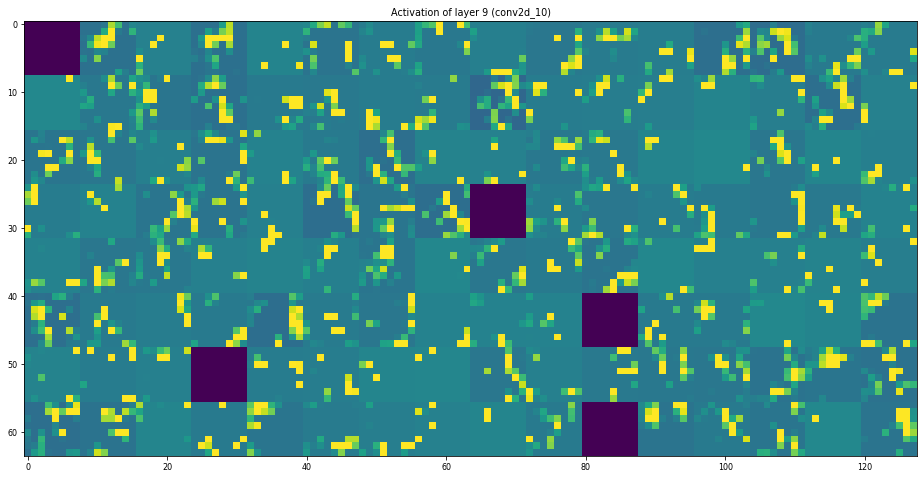

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


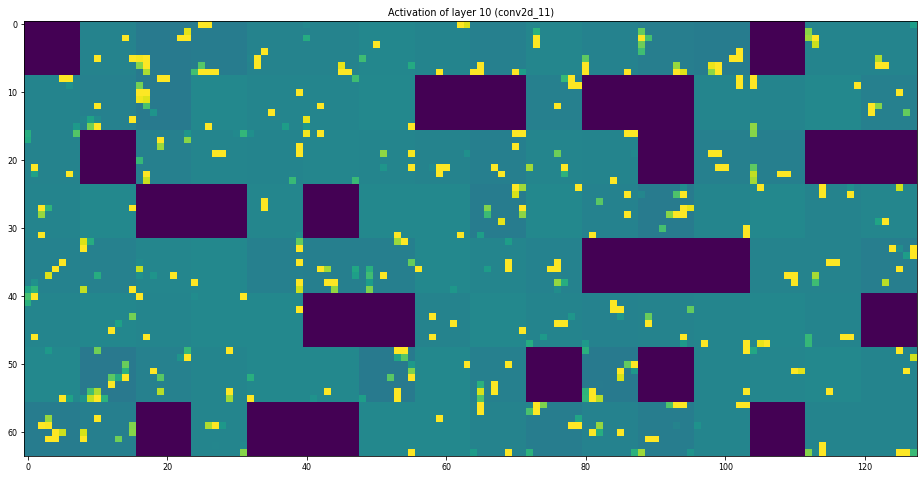

In [ ]:
plot_activations(8, activations)
plot_activations(9, activations)

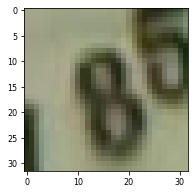

In [ ]:
plt.imshow(X_test[0])

In [ ]:
answer_q_3_2 = """
               In layer 1, the outlines of numbers and some basic shapes are learnt, such as horizontal and diagonal lines 
               In layer 2, some combinations of activations from the first layer are noticable. Stronger diagonal and horizontal lines are learned.
               Deeper layers start to learn complex combinations of the simple pattterns from the early layers and they
               are harder to interpret. These includes combining patterns from background and target, target and target and 
               also background and background (noise) and some kernels are deactivated.
               """

### Question 3.3: Visualizing the learned embeddings with tSNE (4 points)

Extract the learned embeddings of the images from X_train using your `model_2_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings of the training set based on the  Convolutional part of `model_2_2` (e.g VGG16 generates 512-sized embeddings)
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for VGG16 this will mean `original_array` of  size (num_images, 512) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true binary labels. 
- Please note that this may take a while to compute the tSNE embeddings.
- Interpret the results from the map in `answer_q_2_3`

In [ ]:
from sklearn.manifold import TSNE

def create_embeddings(model_file):
    """ Returns the image embeddings of X_train learned in the given model
    """
    model = load_model_from_file(base_dir, model_file)
    embedding_model = models.Model(inputs=model.input, outputs=model.layers[12].output)
     
    return embedding_model.predict(X_train_gray).reshape(len(X_train_gray), -1)

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by TSNE
    """
    tsne_transfromer = TSNE(2)
    return tsne_transfromer.fit_transform(original_array)

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_2_2")
d2_embs = compute_tsne(dn_embs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
d2_embs.shape

(63544, 2)

In [ ]:
with open(os.path.join(base_dir, 'd2_embs_train.pkl'), 'wb') as file:
    pickle.dump(d2_embs, file)

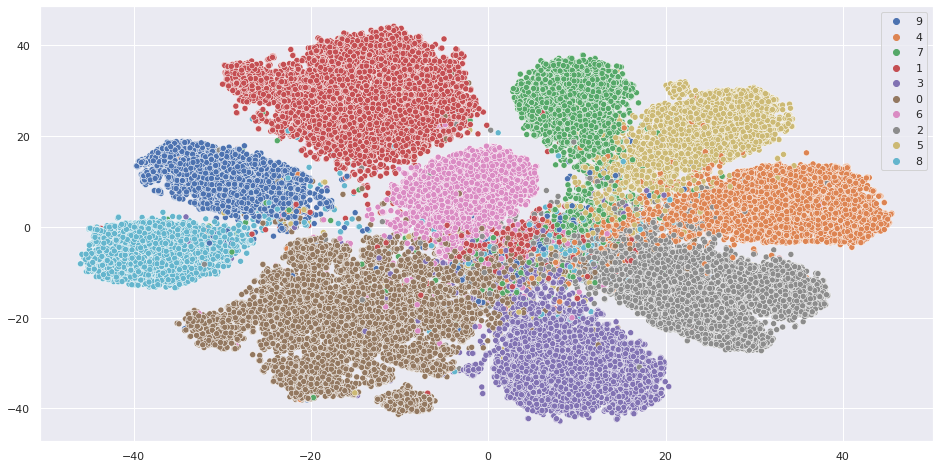

In [ ]:
import seaborn as sns

def plot_tsne(tsne_embeds, labels):
    labels = np.argmax(labels, axis=1)
    sns.set(rc={'figure.figsize':(16,8)})
    sns.scatterplot(x=tsne_embeds[:, 0].flatten(), y=tsne_embeds[:,1].flatten(), hue=labels.astype(str).flatten())

plot_tsne(d2_embs, y_train)

In [ ]:
answer_q_3_3 = """
 Most of the numbers are clustered in clearly separated groups. When closer to the origin, 
 the more mixed numbers are presented probably because of more noisy there, while further from origin, 
 the separation between different clusters is larger. Some numbers cluster closer to each other (i.e., 7,5,4) 
 while other numbers cluster a bit further to each other (i.e., 9,3,0,6,1). This plot is somehow
 a bit aligned with the results from confusion matrix.
               """
print("Answer is {} characters long".format(len(answer_q_3_3)))

Answer is 475 characters long


## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base.
- You can also add any kind of regularization.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

conv_base =  tf.keras.applications.VGG16(
                include_top=False,
                weights="imagenet",
                input_tensor=None,
                input_shape=(32, 32, 3),
                pooling=None,
                classes=1000,
                classifier_activation="softmax")

58900480/58889256 [==============================] - 1s 0us/step


Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPool

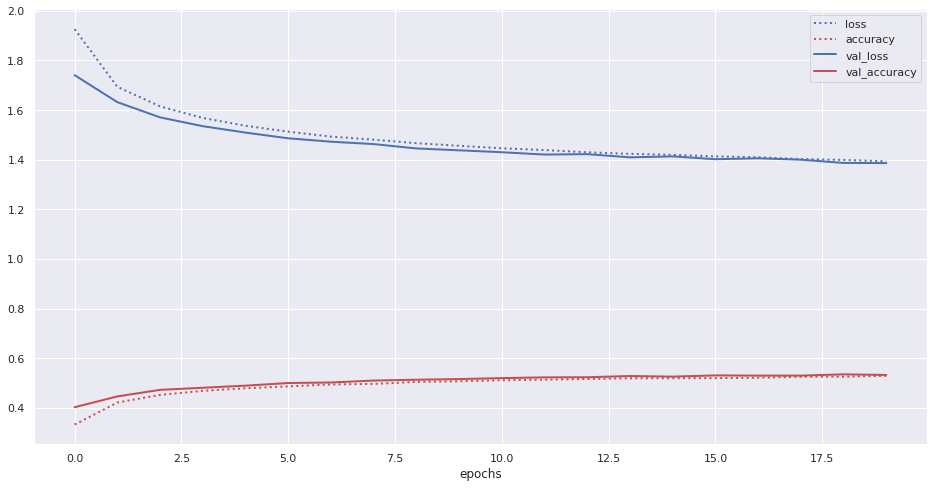

In [ ]:
def build_model_4_1():
  
  model = conv_base
  updated_model = Sequential()
  # Add drop out regularization in some convolutional blocks
  for layer in model.layers:
      updated_model.add(layer)
      if layer.name in ['block1_pool','block3_pool']:
        updated_model.add(Dropout(.1))
  model = updated_model

  # Add dense layer
  model.add(layers.Flatten())
  model.add(layers.Dense(units=10, activation='softmax')) 

  # Freeze convolutional base
  conv_base.trainable = False

  # Add l1_l2 regularization
  for layer in model.layers:
      for attr in ['kernel_regularizer']:
          if hasattr(layer, attr):
            setattr(layer, attr, tf.keras.regularizers.l1_l2())

  model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=256)

In [ ]:
answer_q_4_1 = """
               There's a small amount of params to train, only 5130 params are trainable. 
               Looking at the accuracy score of .53 for the training and validation set which is low.
               This is because the convolutional base is frozen and thus not much training is happening inside the model.
               Also, the usage of regularization will also have little effect on the performance. As there 
               is very little params to regularize.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

Answer is 491 characters long


### Question 4.2 Optimizing transfer (5 points)

Perform the same transfer learning as in `Question 4.1`, but try to improve the performance.

- Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Consider other models to transfer from. For a comparison between different architectures, see [this link](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d), or choose one of the available architectures from [Keras Applications](https://keras.io/api/applications/). 
- Keep in mind that bigger models don't always perform better, some don't work on small images. Also try to use models that do
not take more than 100MB of storage.
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_2'.


######Using VGG16 with unfreezed convolutional layers



Loading model from file
Success!
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPool

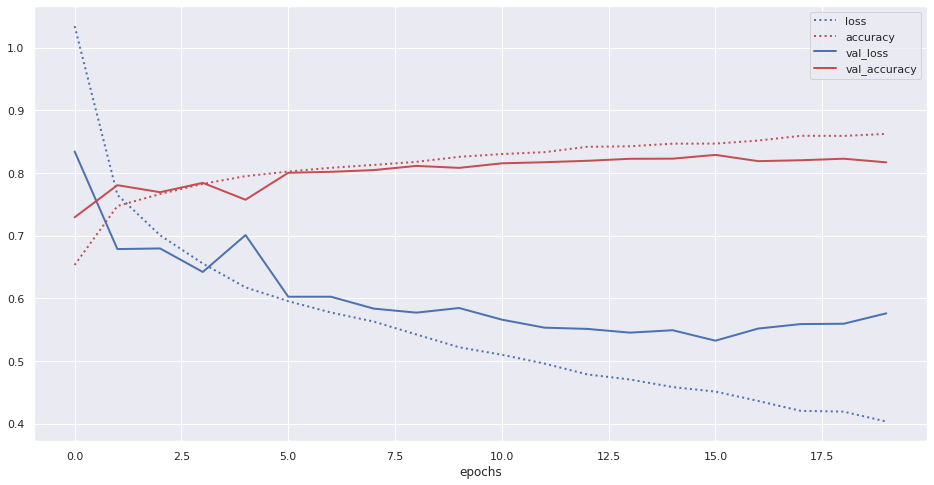

In [ ]:
# Load pre-trained model, can be other than VGG16

def build_model_4_2():

  model = conv_base
  updated_model = Sequential()
  # Add drop out regularization in some convolutional blocks
  for layer in model.layers:
      updated_model.add(layer)
      if layer.name in ['block1_pool','block3_pool']:
        updated_model.add(Dropout(.1))
  model = updated_model

  # Add dense layer
  model.add(layers.Flatten())
  model.add(layers.Dense(units=10, activation='softmax')) 

  # Unfreeze the last convolutional block
  for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
      layer.trainable = True
    else:
      layer.trainable = False

  # Add l1_l2 regularization
  for layer in model.layers:
      for attr in ['kernel_regularizer']:
          if hasattr(layer, attr):
            setattr(layer, attr, tf.keras.regularizers.l1_l2())
  
  model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

  return model

run_evaluation("model_4_2", build_model_4_2, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=256)


###### Using VGG19 with freezed and unfreezed convolutional layers

In [ ]:
conv_base1 = tf.keras.applications.VGG19(
              include_top=False,
              weights="imagenet",
              input_tensor=None,
              input_shape=(32, 32, 3),
              pooling=None,
              classes=1000,
              classifier_activation="softmax"
          )

#conv_base1.summary()

80150528/80134624 [==============================] - 2s 0us/step


Loading model from file
Success!
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPool

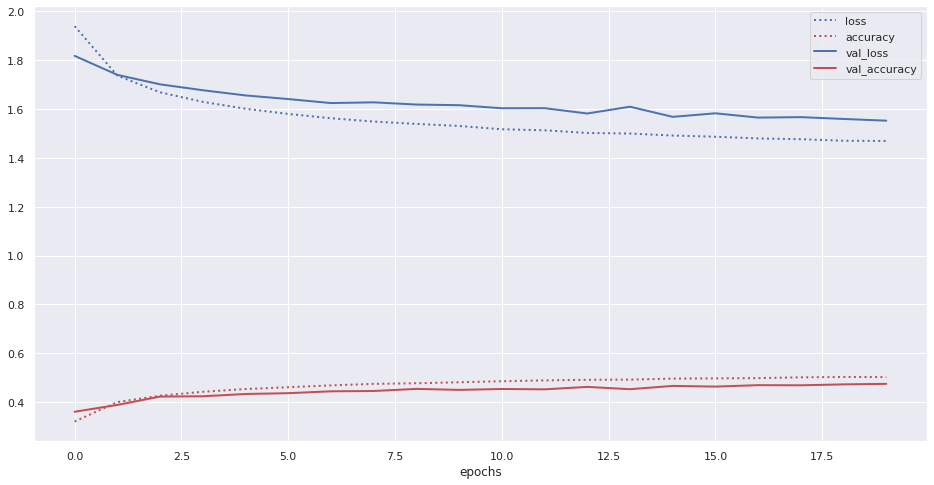

In [ ]:
def build_model_4_1_VGG19():
  
  model = conv_base1
  updated_model = Sequential()
  # Add drop out regularization in some convolutional blocks
  for layer in model.layers:
      updated_model.add(layer)
      if layer.name in ['block1_pool','block3_pool']:
        updated_model.add(Dropout(.1))
  model = updated_model

  # Add dense layer
  model.add(layers.Flatten())
  model.add(layers.Dense(units=10, activation='softmax')) 

  # Freeze convolutional base
  conv_base1.trainable = False

  # Add l1_l2 regularization
  for layer in model.layers:
      for attr in ['kernel_regularizer']:
          if hasattr(layer, attr):
            setattr(layer, attr, tf.keras.regularizers.l1_l2())

  model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

  return model

run_evaluation("model_4_1_VGG19", build_model_4_1_VGG19, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=256)

Loading model from file
Success!
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 dropout_17 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPoo

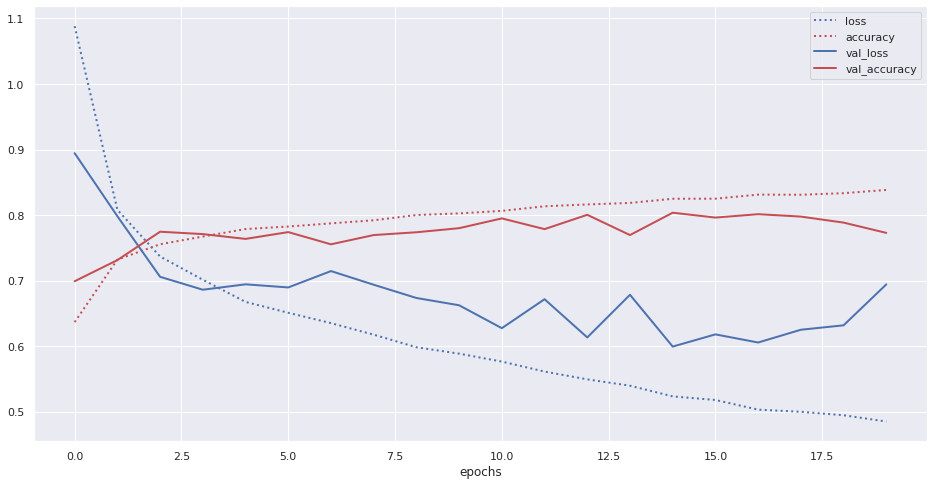

In [ ]:
# Load pre-trained model, can be other than VGG16

def build_model_4_2_VGG19():

  model = conv_base1
  updated_model = Sequential()
  # Add drop out regularization in some convolutional blocks
  for layer in model.layers:
      updated_model.add(layer)
      if layer.name in ['block1_pool','block3_pool']:
        updated_model.add(Dropout(.1))
  model = updated_model

  # Add dense layer
  model.add(layers.Flatten())
  model.add(layers.Dense(units=10, activation='softmax')) 

  # Unfreeze the last convolutional block
  for layer in conv_base1.layers:
    if layer.name == 'block5_conv1':
      layer.trainable = True
    else:
      layer.trainable = False

  # Add l1_l2 regularization
  for layer in model.layers:
      for attr in ['kernel_regularizer']:
          if hasattr(layer, attr):
            setattr(layer, attr, tf.keras.regularizers.l1_l2())
  
  model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

  return model

run_evaluation("model_4_2_VGG19", build_model_4_2_VGG19, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=256)

###### Questions 4.2 Answer

In [ ]:
answer_q_4_2 = """
               Unfreezing the last convolutional (convo) block for VGG16, results in an improved score of .83
               The VGG19 model was tested with the convo base completely frozen, which performed worse (score = .47)
               Unfreezing the last convo block improved performance with a score of .80.
               VGG16 performed better than VGG19, with the same amount of trainable params. Unfreezing does seem to help performance and likely regularization as well.
               """
print("Answer is {} characters long".format(len(answer_q_4_2)))

Answer is 500 characters long
